In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import  metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [117]:
X_train = pd.read_csv('exoTrain.csv')
y_train = X_train['LABEL']
X_train = X_train.drop(columns=['LABEL'], axis=1)
X_test =pd.read_csv('exoTest.csv')
y_test = X_test['LABEL']
X_test = X_test.drop(columns=['LABEL'], axis=1)

In [118]:
X_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


I chose a robust scaler for standardization

In [129]:
scl = RobustScaler()
scl.fit(X_train)
X_train_scl = scl.transform(X_train)
scl.fit(X_test)
X_test_scl = scl.transform(X_test)

## Model: Gradient Boosting

In [135]:
GB = GradientBoostingClassifier()
GB.fit(X_train_scl, y_train)
prediction_GB=GB.predict(X_test_scl)
train_score_GB = GB.score(X_train_scl, y_train)
test_score_GB = GB.score(X_test_scl, y_test)
print(f"Gradient Boosting train score: {train_score_GB}")
print(f"Gradient Boosting test score: {test_score_GB}")
print(classification_report(y_test, prediction_GB))


Gradient Boosting train score: 1.0
Gradient Boosting test score: 0.987719298245614
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



## Model: Decision Tree

In [131]:
DT = DecisionTreeClassifier()
DT.fit(X_train_scl, y_train)
prediction_DT=DT.predict(X_test_scl)
train_score_DT = DT.score(X_train_scl, y_train)
test_score_DT = DT.score(X_test_scl, y_test)
print(f"Decision Tree train score: {train_score_DT}")
print(f"Decision Tree test score: {test_score_DT}")
print('Decision Tree Classifier')
print(classification_report(y_test, prediction_DT))

Decision Tree train score: 1.0
Decision Tree test score: 0.9842105263157894
Decision Tree Classifier
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.25      0.40      0.31         5

    accuracy                           0.98       570
   macro avg       0.62      0.69      0.65       570
weighted avg       0.99      0.98      0.99       570



## Model: AdaBoost

In [133]:
AB = AdaBoostClassifier()
AB.fit(X_train_scl, y_train)
prediction_AB=AB.predict(X_test_scl)
train_score_AB = AB.score(X_train_scl, y_train)
test_score_AB = AB.score(X_test_scl, y_test)
print(f"AdaBoost train score: {train_score_AB}")
print(f"Adaboost test score: {test_score_AB}")
print(classification_report(y_test, prediction_AB))


AdaBoost train score: 1.0
Adaboost test score: 0.9912280701754386
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model: Random Forest

In [134]:
RF = RandomForestClassifier()
RF.fit(X_train_scl, y_train)
prediction_RF=RF.predict(X_test_scl)
train_score_RF = RF.score(X_train_scl, y_train)
test_score_RF = RF.score(X_test_scl, y_test)
print(f"RF train score: {train_score_RF}")
print(f"RF test score: {test_score_RF}")
print(classification_report(y_test, prediction_RF))


RF train score: 1.0
RF test score: 0.9912280701754386
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model: Bagging

In [128]:
BG = BaggingClassifier()
BG.fit(X_train, y_train)
prediction_BG=BG.predict(X_test)
train_score_BG = BG.score(X_train, y_train)
test_score_BG = BG.score(X_test, y_test)
print(f"BG train score: {train_score_BG}")
print(f"BG test score: {test_score_BG}")
print(classification_report(y_test, prediction_BG))


BG train score: 0.997444466286613
BG test score: 0.9912280701754386
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model compairing

I used some kinds of models: Gradient Boosting, Decision Tree, AdaBoost, Random Forest and Bagging. I chose them for better understanding of how they work. As we can see on the diagram, they perform good results. 
I will try some experiments with another models soon.

Text(0, 0.5, 'Score')

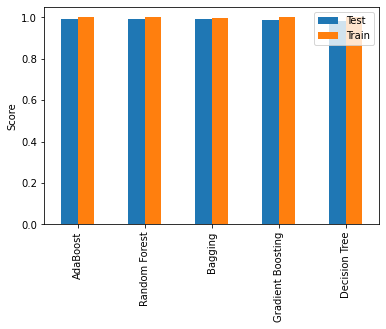

In [139]:
data = {'Gradient Boosting': {'Train': train_score_GB, 'Test': test_score_GB},
        'Decision Tree': {'Train': train_score_DT, 'Test': test_score_DT},
        'AdaBoost': {'Train': train_score_AB, 'Test': test_score_AB},
        'Random Forest': {'Train': train_score_RF, 'Test': test_score_RF},
        'Bagging': {'Train': train_score_BG, 'Test': test_score_BG}}
df = pd.DataFrame(data)
df = df.T
df ['sum'] = df.sum(axis=1)
df.sort_values('sum', ascending=False)[['Test','Train']].plot.bar() 
plt.ylabel('Score')